# Convolutional Neural Network

In [1]:
import tensorflow as tf
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import json

In [2]:
# open folder
path = "/Users/tarasplint/Desktop/Scriptie/code/random_spirals"
files = os.listdir(path)

json_labels = open("random_spirals.json")
json_labels = json.load(json_labels)

# load images
images = []
paths = []
for file in files:
    image = cv2.imread(path + "/" + file)
    # image = cv2.resize(image, (256, 256))
    image = cv2.resize(image, (128, 128))
    images.append(image)
    paths.append(file)

# normalize images
images = np.array(images)
images = images / 255.0


# # split data into training and testing
# images = np.array(images)
# paths = np.array(paths)

(-0.5, 127.5, 127.5, -0.5)

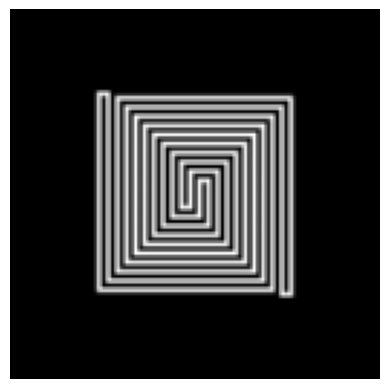

In [3]:
plt.imshow(images[17])
# plt.imshow(images[0])
plt.axis('off')

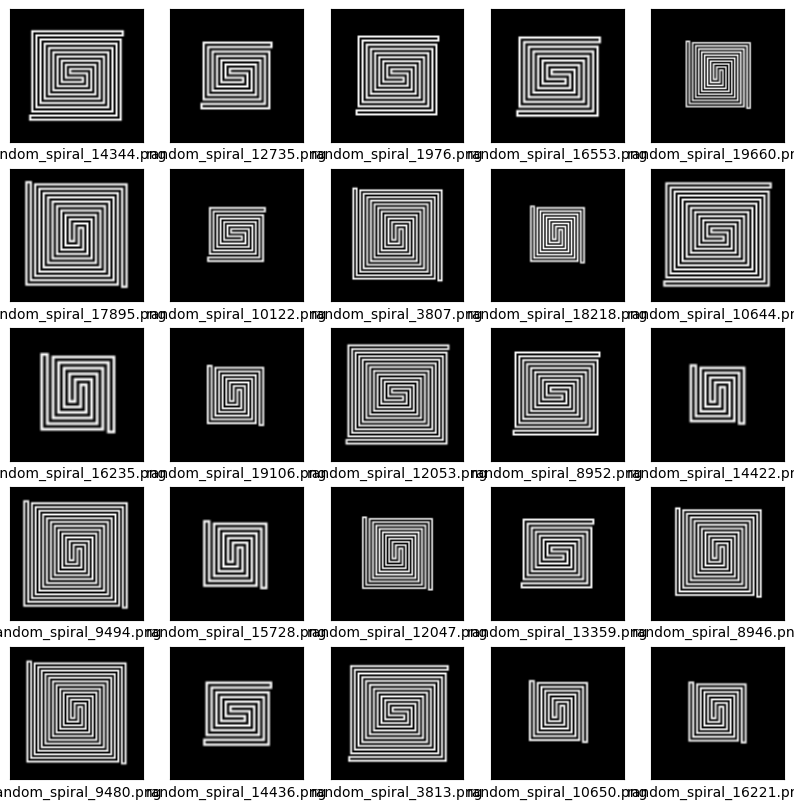

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(paths[i])


In [5]:
train_images, test_images, train_paths, test_paths = train_test_split(images, paths, test_size=0.2, random_state=42)

# train_images = train_images.astype('float32') / 255.0
# test_images = test_images.astype('float32') / 255.0

# find labels of training data
train_labels = []
for path in train_paths:
    for label in json_labels:
        label_path = label + ".png"
        if path == label_path:
            train_labels.append(json_labels[label])
            break

# print(train_labels)
train_labels = [x - 1 for x in train_labels]
# print(train_labels)


# find labels of testing data
test_labels = []
for path in test_paths:
    for label in json_labels:
        label_path = label + ".png"
        if path == label_path:
            test_labels.append(json_labels[label])
            break

test_labels = [x - 1 for x in test_labels]
# print(test_labels)

In [6]:
# count the amount of each label
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
unique, counts = np.unique(train_labels, return_counts=True)
unique_test, counts_test = np.unique(test_labels, return_counts=True)
print(dict(zip(unique, counts)))
print(dict(zip(unique_test, counts_test)))


{0: 8169, 1: 7831}
{0: 1928, 1: 2072}


In [7]:
print("Data type:", train_images.dtype)
print("Min value:", train_images.min())
print("Max value:", train_images.max())
print("First few labels:", train_labels[:10])

Data type: float64
Min value: 0.0
Max value: 1.0
First few labels: [0 1 1 1 0 1 1 0 1 0]


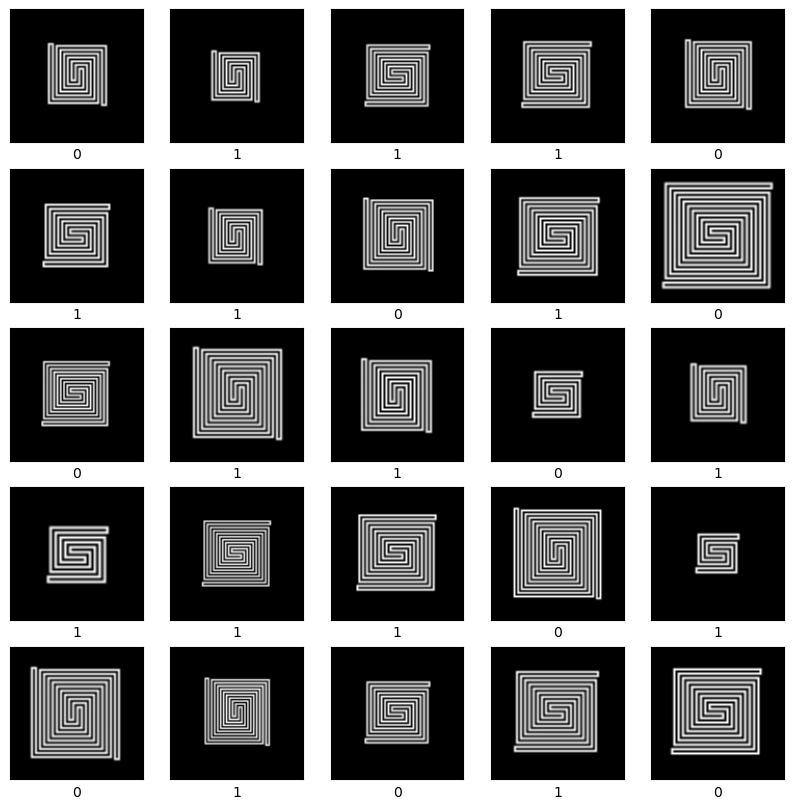

In [8]:
# print the first 15 images of the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])


In [9]:
inputShape = (128, 128, 3)

model = Sequential([
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=inputShape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Convolutional layer 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Convolutional layer 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Convolutional layer 4
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Convolutional layer 5
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Flattening the outputs from the convolutional layers to feed into the dense layers
    Flatten(),
    
    # Dense layer 1
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Output layer with binary classification (connected or not)
    Dense(1, activation='sigmoid')
    # TODO: one-hot encoding
    # softmax functie
])

# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),

#     Conv2D(64, (3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),

#     Conv2D(128, (3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),

#     Conv2D(256, (3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
    
#     Conv2D(256, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2)),
#     BatchNormalization(),
    
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])


# model.summary()  # This will print the summary of the model and show the number of parameters


model.count_params()

/opt/anaconda3/envs/TFbase/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-12 18:49:12.991831: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-05-12 18:49:12.991874: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-12 18:49:12.991877: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-12 18:49:12.992492: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-12 18:49:12.992519: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.c

3670209

In [10]:
# Compile the model
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Train the model
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

: 

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3500 - loss: 14.7847
Test Loss: 14.784692764282227
Test Accuracy: 0.3499999940395355


In [ ]:
# test it on a single image
test_image = cv2.imread("../Spiral_generate/random_spirals/random_spiral_12002.png")
# test_image = np.expand_dims(test_image, axis=0)
# print(test_image.shape)

# convert to 128, 128, 3
test_image = cv2.resize(test_image, (128, 128))
test_image = np.array(test_image)
test_image = test_image.astype('float32') / 255.0
test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)
plt.imshow(test_image[0])

prediction = model.predict(test_image)
print(prediction)
if prediction > 0.5:
    print("Not Connected")
else:
    print("Connected")

[ WARN:0@15.643] global /Users/runner/miniforge3/conda-bld/libopencv_1658893793880/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../Spiral_generate/random_spirals/random_spiral_12002.png'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /Users/runner/miniforge3/conda-bld/libopencv_1658893793880/work/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
